In [2]:
import pandas as pd
import seaborn as sns
import matplotlib

sns.set_theme(style="whitegrid")

In [57]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-06-06.csv')
df

,fips,county_name,state,division,region,vaccine_hesitant,vaccine_hesitant_strong,vaccine_hesitant_category,social_vulnerability_index,ethnicity_hispanic,...,poverty,education_high_school_less,education_high_school_only,education_degree_some,education_bachelors_degree,religion_total,religion_evangelical,religion_mainline_protestant,election_democrat_wins,election_republican_wins
0,1131,"Wilcox County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.93,0.0053,...,0.325,0.235,0.395,0.245,0.125,610.450000,294.938889,48.670000,4,0
1,1129,"Washington County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.73,0.0146,...,0.186,0.174,0.431,0.269,0.127,584.950000,420.398889,70.640000,0,4
2,1133,"Winston County, Alabama",Alabama,East South Central,South,0.22,0.11,Medium,0.70,0.0315,...,0.167,0.212,0.382,0.278,0.128,611.580000,551.340000,45.618889,0,4
3,1127,"Walker County, Alabama",Alabama,East South Central,South,0.23,0.11,Medium,0.75,0.0249,...,0.173,0.182,0.375,0.330,0.113,653.508889,583.648889,38.078889,0,4
4,1125,"Tuscaloosa County, Alabama",Alabama,East South Central,South,0.22,0.10,Medium,0.63,0.0372,...,0.162,0.117,0.299,0.277,0.307,535.888889,368.870000,63.780000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,55079,"Milwaukee County, Wisconsin",Wisconsin,East North Central,Midwest,0.18,0.11,Medium,0.81,0.1500,...,0.169,0.117,0.284,0.290,0.310,463.758889,122.708889,54.500000,4,0
3107,55121,"Trempealeau County, Wisconsin",Wisconsin,East North Central,Midwest,0.18,0.10,Medium,0.28,0.0840,...,0.089,0.093,0.390,0.324,0.193,736.360000,58.578889,410.220000,2,2
3108,56001,"Albany County, Wyoming",Wyoming,Mountain,West,0.30,0.16,High,0.25,0.0953,...,0.160,0.041,0.147,0.295,0.518,360.120000,67.250000,67.048889,2,2
3109,55067,"Langlade County, Wisconsin",Wisconsin,East North Central,Midwest,0.17,0.10,Medium,0.35,0.0197,...,0.130,0.097,0.423,0.313,0.167,654.350000,199.030000,85.048889,1,3


In [62]:
# TODO: Bar charts (univariate) to explore vaccine hesitancy cluster groups along demographic data
# TODO: Scatterplots and heatmaps to visualize correlations between vaccine hesitancy and demographic variables
# TODO: Choropleth maps to visualize geographical county level data of vaccine hesitancy and demographic variables.
# TODO: Box plot graphs on vaccine hesitancy rates to look at distribution and find out cut off values for groupings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fips                          3111 non-null   int64  
 1   county_name                   3111 non-null   object 
 2   state                         3111 non-null   object 
 3   division                      3044 non-null   object 
 4   region                        3044 non-null   object 
 5   vaccine_hesitant              3111 non-null   float64
 6   vaccine_hesitant_strong       3111 non-null   float64
 7   vaccine_hesitant_category     3111 non-null   object 
 8   social_vulnerability_index    3110 non-null   float64
 9   ethnicity_hispanic            3111 non-null   float64
 10  ethnicity_native              3111 non-null   float64
 11  ethnicity_asian               3111 non-null   float64
 12  ethnicity_black               3111 non-null   float64
 13  eth

## Vaccine Hesitancy

Our vaccine hesitant mean, median and standard deviation are:  0.19474445515911284 ,  0.19  and  0.046197436775025455


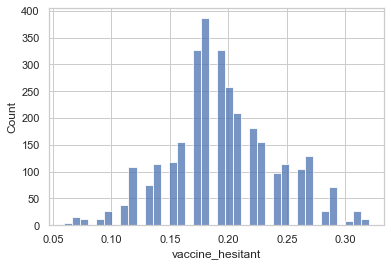

In [19]:
print('Our vaccine hesitant mean, median and standard deviation are: ', df['vaccine_hesitant'].mean(), ', ', df['vaccine_hesitant'].median(), ' and ', df['vaccine_hesitant'].std())
vaccine_hesitant_histogram = sns.histplot(data=df, x='vaccine_hesitant')
# TODO: Find out reason for missing columns, discuss slight right skew (median < mean)

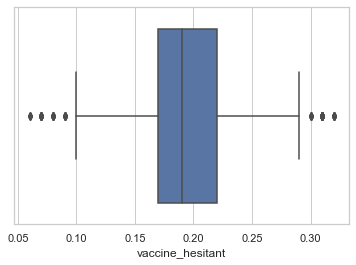

In [15]:
vaccine_hesitant_boxplot = sns.boxplot(x=df['vaccine_hesitant'])

## Ethnicity



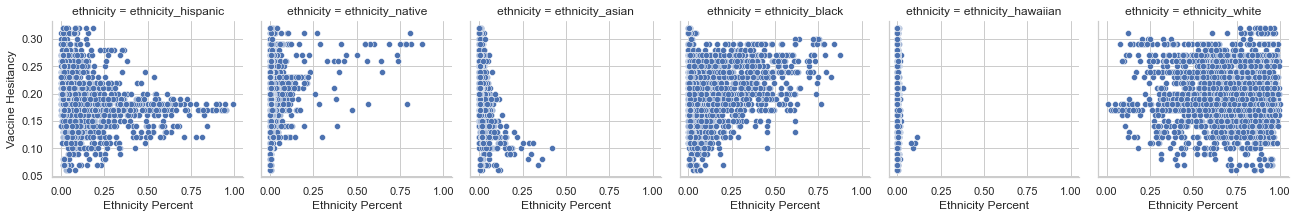

In [96]:
df_narrow_ethnicity = df.melt(id_vars=['vaccine_hesitant'], value_vars=['ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white'], var_name='ethnicity')
graph = sns.FacetGrid(df_narrow_ethnicity, col='ethnicity')
graph.map_dataframe(sns.scatterplot, x='value', y='vaccine_hesitant')
graph.set_axis_labels("Ethnicity Percent", "Vaccine Hesitancy")

## Geography

In [64]:
# graph = sns.FacetGrid(df, col='region')
# graph.map(sns.distplot, x='vaccine_hesitant', bins=20)
df.plot(x='vaccine_hesitant', kind='hist', )

C:\Users\ksubramaniam\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'vaccine_hesitant'